# Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox



In [510]:
df_marketing = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')


df_marketing

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Get the numerical data
Get numerical data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [511]:
# np.number 

df_numerical = df_marketing.select_dtypes(include=np.number)
df_numerical



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


## Get the categorical data


In [512]:
df_categorical = df_marketing.select_dtypes(exclude=np.number)
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## Normality
Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables


/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income distribution')

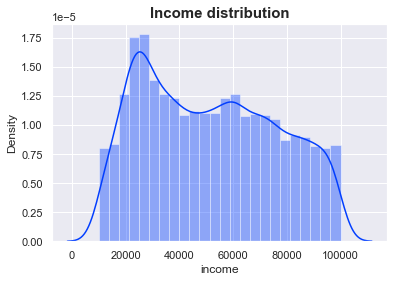

In [513]:
#Plotting distribution using displot()
#variable: income
sns.distplot(df_numerical.income)
plt.title('Income distribution', size='15', fontweight='bold')



/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of policies distribution')

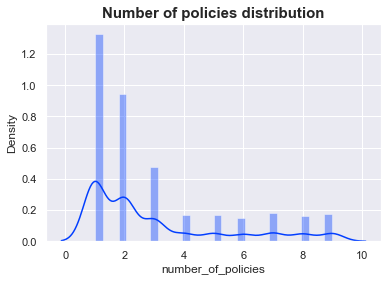

In [514]:
#variable: number_of_policies
sns.distplot(df_numerical.number_of_policies)
plt.title('Number of policies distribution', size='15', fontweight='bold')



/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

Text(0.5, 0.98, 'Numerical Data Distribution')

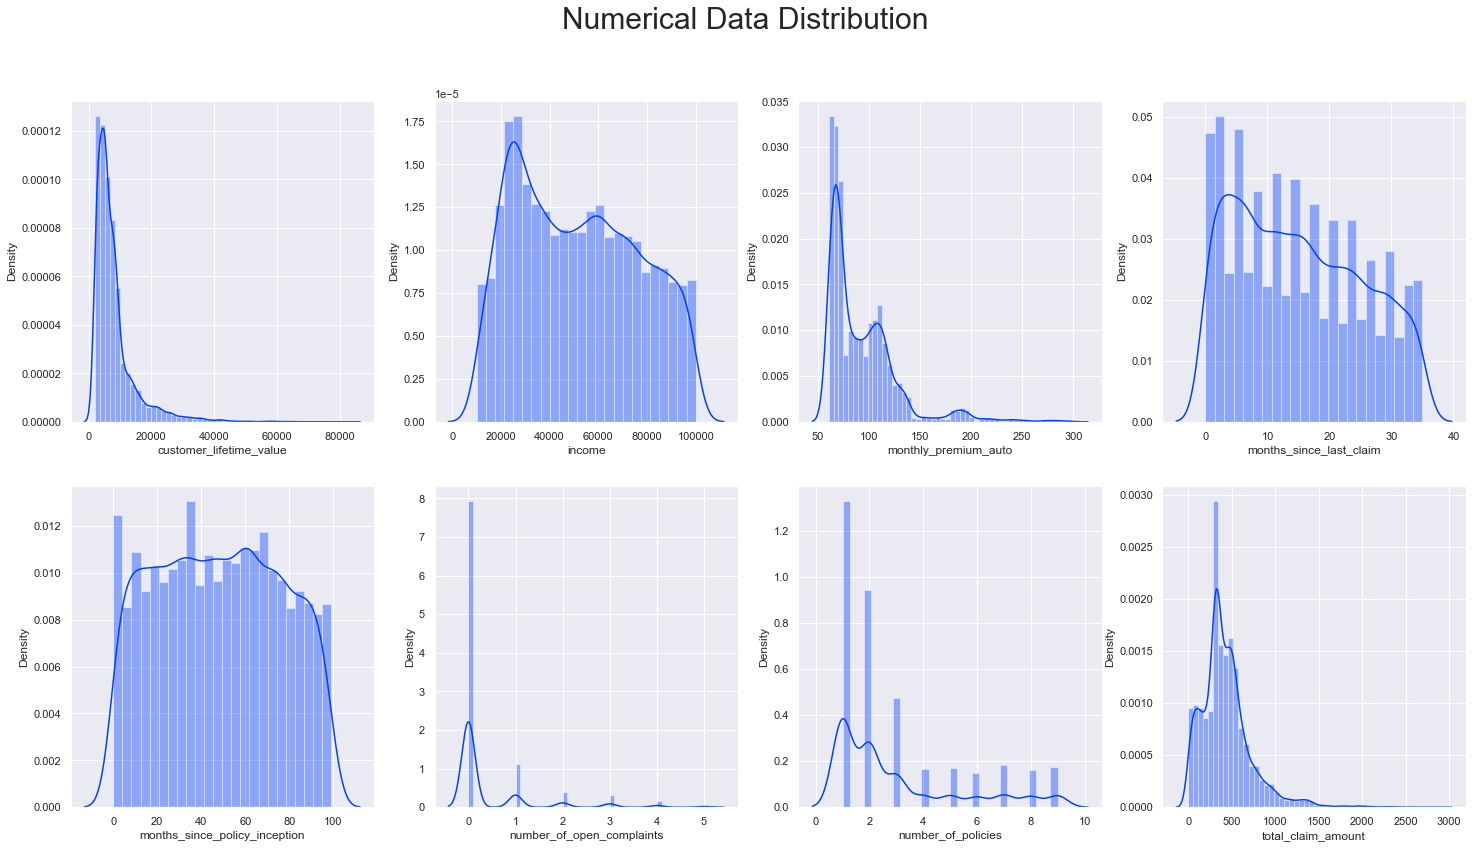

In [515]:
#ploting SUBPLOTS with distplot() It is the same but with more plots
fig1,axe1=plt.subplots(2,4,figsize=(25,13))
sns.distplot(df_numerical.customer_lifetime_value, ax=axe1[0,0])
sns.distplot(df_numerical.income, ax=axe1[0,1])
sns.distplot(df_numerical.monthly_premium_auto, ax=axe1[0,2])
sns.distplot(df_numerical.months_since_last_claim, ax=axe1 [0,3])
sns.distplot(df_numerical.months_since_policy_inception, ax=axe1[1,0])
sns.distplot(df_numerical.number_of_open_complaints, ax=axe1 [1,1])
sns.distplot(df_numerical.number_of_policies, ax=axe1 [1,2])
sns.distplot(df_numerical.total_claim_amount, ax=axe1 [1,3])

plt.suptitle("Numerical Data Distribution", fontsize=30)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

<Figure size 2880x2880 with 0 Axes>

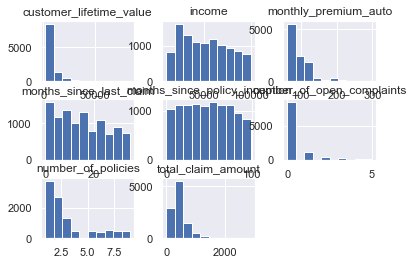

In [335]:
#distribution with hist()
fig=plt.figure(figsize=(40,40))

df_numerical.hist()


## Use Matplotlib to construct histograms.
Do the distributions for different numerical variables look like a normal distribution

Text(0.5, 0.98, 'Numerical Data Distribution with Histograms (Matplotlib)')

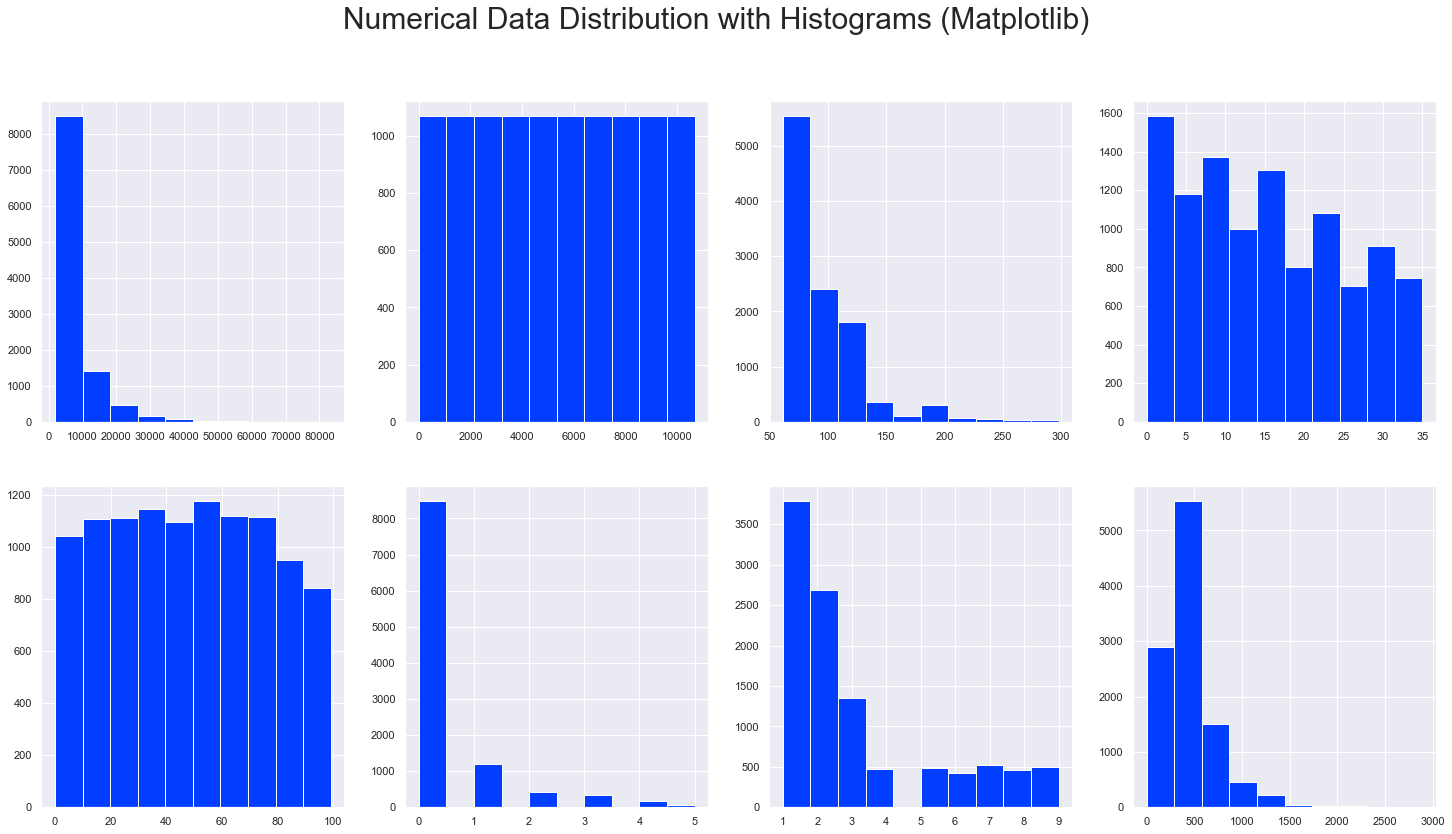

In [517]:
# create figure and axes
fig3, axes3 = plt.subplots(2,4,figsize = (25,13))

# plot the hist chart
axes3[0,0].hist(df_numerical.customer_lifetime_value)
axes3[0,1].hist(df_numerical.income.index )
axes3[0,2].hist(df_numerical.monthly_premium_auto )
axes3[0,3].hist(df_numerical.months_since_last_claim )
axes3[1,0].hist(df_numerical.months_since_policy_inception )
axes3[1,1].hist(df_numerical.number_of_open_complaints )
axes3[1,2].hist(df_numerical.number_of_policies )
axes3[1,3].hist(df_numerical.total_claim_amount)

plt.suptitle("Numerical Data Distribution with Histograms (Matplotlib)", fontsize=30)

## Looking for correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


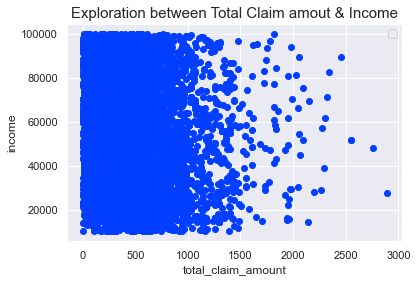

In [516]:
# Looking for correlation using scatter() between Income & Total Claim, but there is not⚠️!
plt.figure()
plt.scatter(df_numerical['total_claim_amount'], df_numerical['income'])
plt.title("Exploration between Total Claim amout & Income", size='15')
plt.legend()
plt.xlabel("total_claim_amount")
plt.ylabel("income")
plt.show()

In [338]:
df_numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


# Checking the Correlation Heatmap.


Text(0.5, 1.0, 'Looking for multicollinearity')

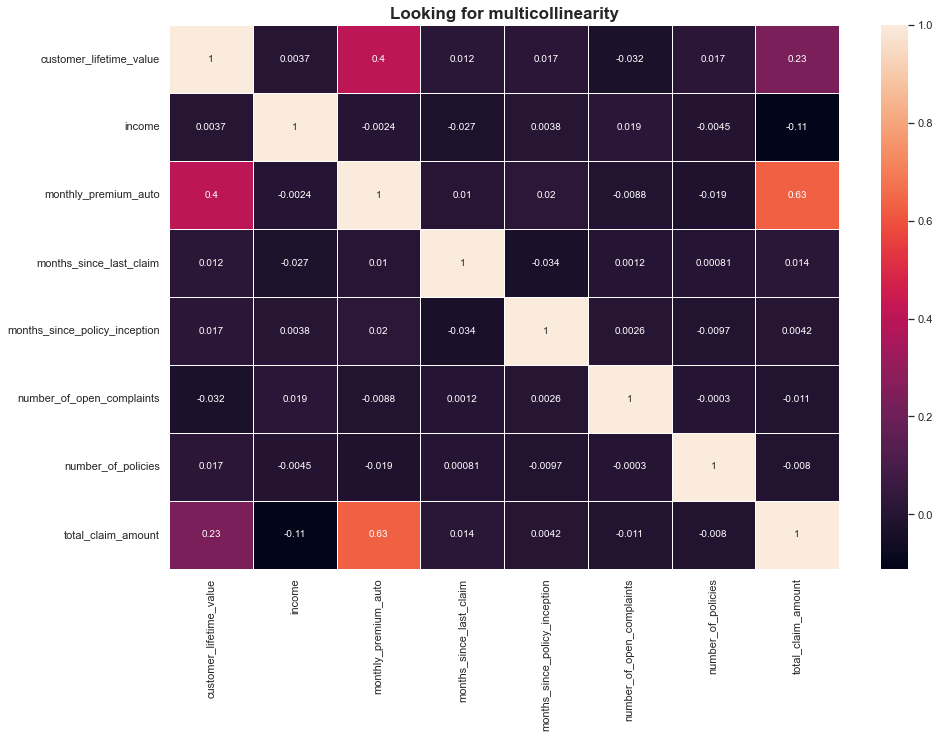

In [519]:
#Plot the Correlation Heatmap.

fig=plt.figure(figsize=(15,10))
sns.heatmap(df_numerical.corr(),annot=True, linewidth= 1)
plt.title('Looking for multicollinearity', size='17', fontweight='bold')



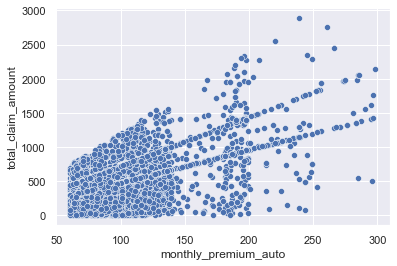

In [340]:
sns.scatterplot(x=df_numerical.monthly_premium_auto, y=df_numerical.total_claim_amount)
sns.set(font_scale = 1)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

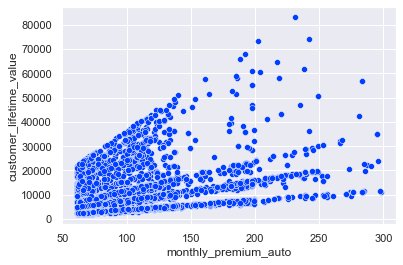

In [499]:
sns.scatterplot(x=df_numerical.monthly_premium_auto, y=df_numerical.customer_lifetime_value)


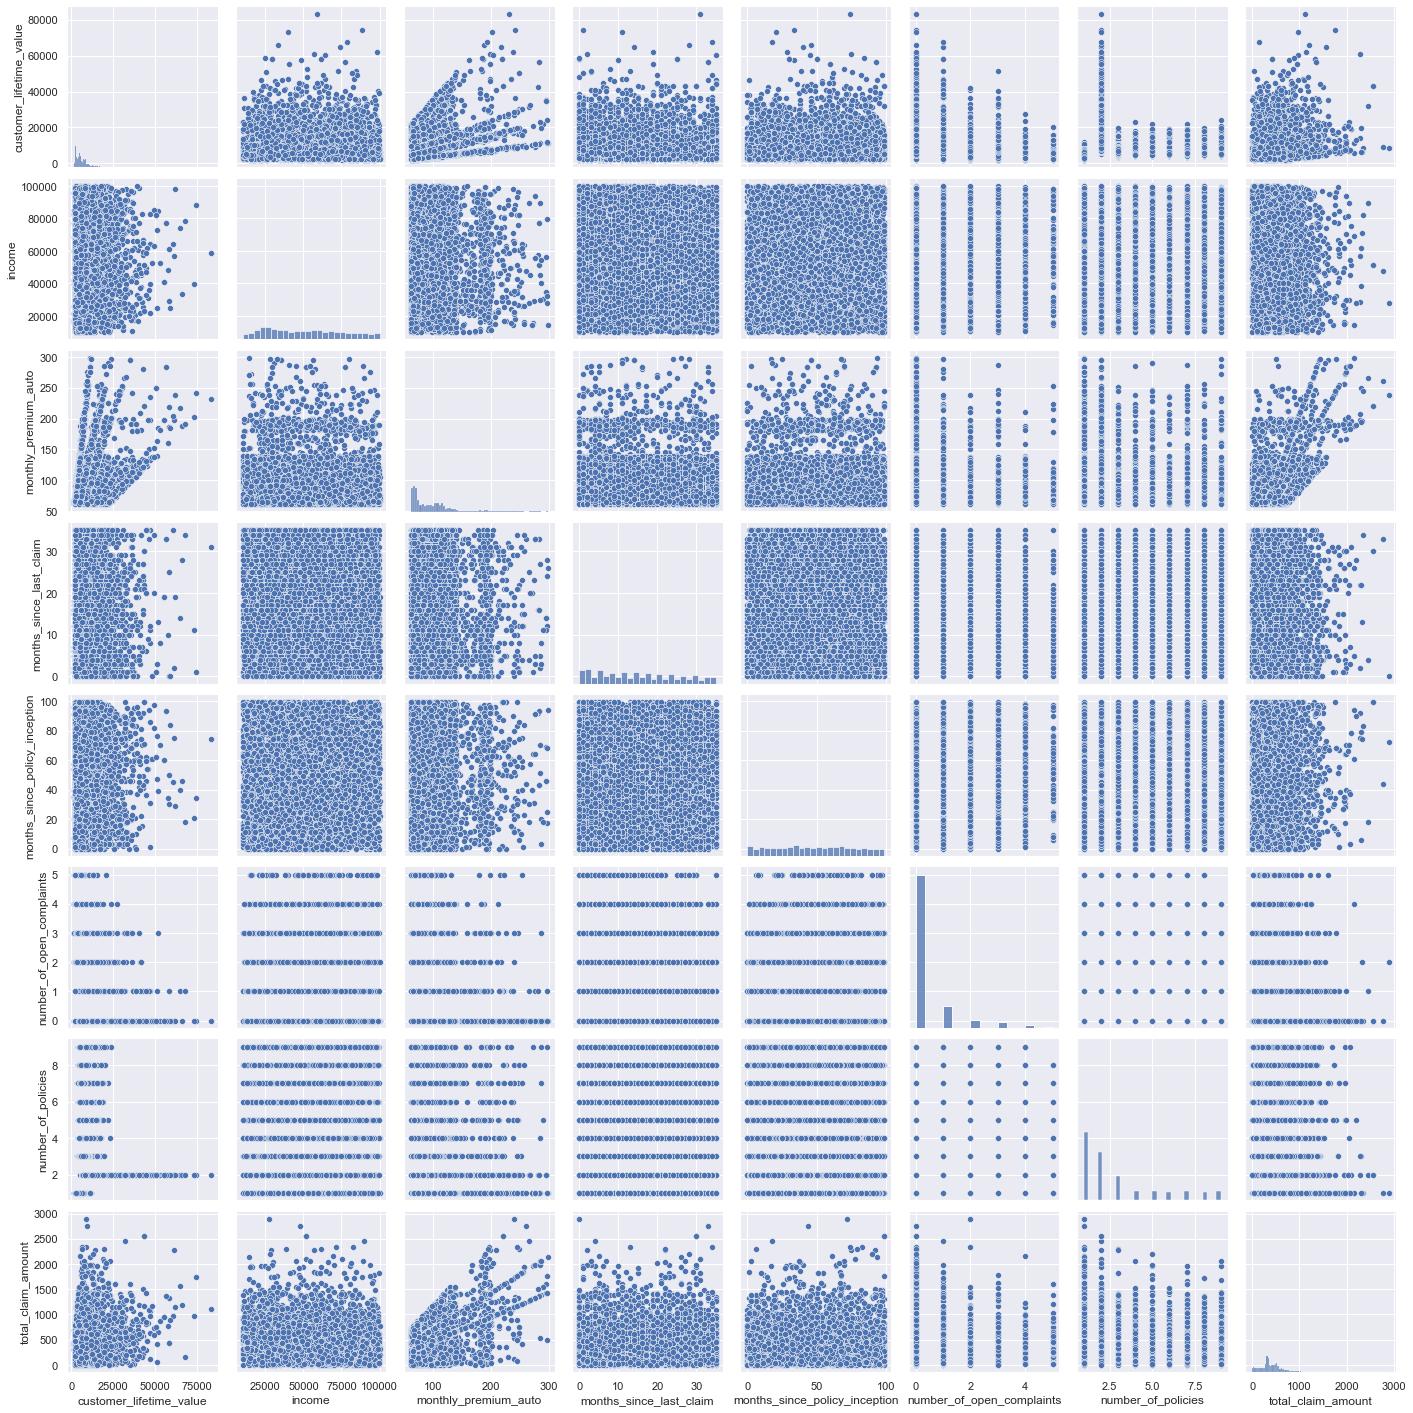

In [342]:
sns.pairplot(df_numerical)

# Activity 4 (Thursday)
Show a plot of the total number of responses.
Show a plot of the response by the sales channel.
Show a plot of the response by the total claim amount.
Show a plot of the response by income.
(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [ ]:

#Income, and Total caim Amount

<BarContainer object of 2 artists>

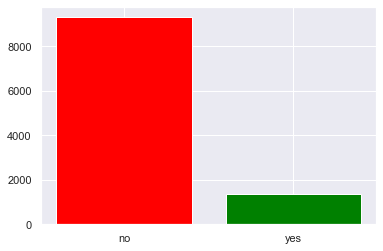

In [416]:
#Show a plot of the total number of responses.

sns.set_palette('bright')

response = df_categorical['response'].value_counts()
plt.bar(response.index, response, color=('red','green'))

#doesnt't aloow palette

Text(0.5, 1.0, 'Total number of responses')

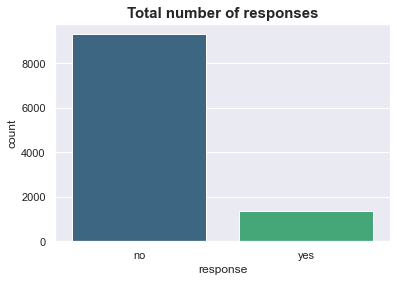

In [449]:
#another possibility 

sns.set_palette('viridis')

ax = sns.countplot(x="response", data=df_categorical, palette='viridis')
plt.title('Total number of responses',size='15', fontweight='bold')


# Show the response by the sales channel


In [367]:
response_by_sales = df_categorical.groupby(['sales_channel']) ['response'].count().reset_index()
response_by_sales

,sales_channel,response
0,agent,4019
1,branch,2975
2,call center,2099
3,web,1596


<AxesSubplot:title={'center':'Response by the sales channel'}, xlabel='sales_channel', ylabel='response'>

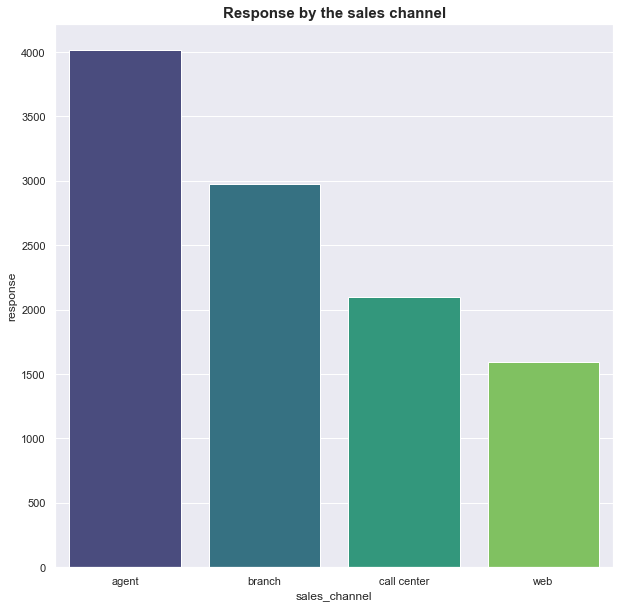

In [453]:
sns.set_palette('bright')
#⚠️ Response by Sales Channel but doesn't plot the type of response(yes/no)

plt.figure(figsize=(10,10))
plt.title('Response by the sales channel', size='15', fontweight='bold')

sns.barplot(x = response_by_sales['sales_channel'],y = response_by_sales['response'], palette='viridis')

In [351]:
#creating a new column(Rating) with the binary yes or no

def rating_function(response):
    if response.startswith('y'):
        return "1"
    else:
        return "0"
    

df_categorical["Rating"]= df_categorical["response"].apply(rating_function)


In [348]:
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Rating
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,0
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize,0
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize,0
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,1
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize,0
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize,0
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,0
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize,0


In [349]:
# create a dataframe with the responde ratings by sales chanel.

response_by_sales = df_categorical.groupby(['sales_channel','response']) ["Rating"].count().reset_index()
# create a dataframe with the responde ratings by sales chanel.
response_by_sales

,sales_channel,response,Rating
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


In [353]:
# create a dataframe with the responde ratings by sales chanel and the COUNTS!!!!!! important🧮

reating_by_sales_chanel = df_categorical.groupby(['sales_channel', 'response', 'Rating'])['Rating'].count().rename('count').reset_index()
reating_by_sales_chanel

,sales_channel,response,Rating,count
0,agent,no,0,3340
1,agent,yes,1,679
2,branch,no,0,2665
3,branch,yes,1,310
4,call center,no,0,1890
5,call center,yes,1,209
6,web,no,0,1421
7,web,yes,1,175


Text(0.5, 1.0, 'Type of response by the sales channel')

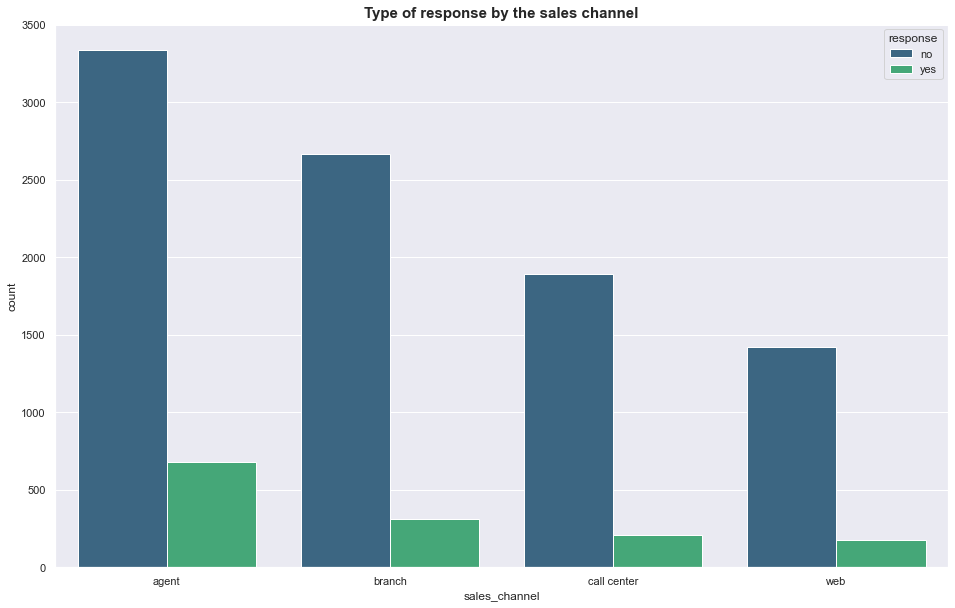

In [532]:
fig5, axes5 = plt.subplots(1,1,figsize=(16,10))

sns.barplot(x='sales_channel', y='count', hue = 'response', data = reating_by_sales_chanel, palette='viridis')

plt.title('Type of response by the sales channel', size='15', fontweight='bold')


### Checking the response by the total claim amount. 



/Users/saori/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Type of response by the Total claim amount.')

<Figure size 1152x720 with 0 Axes>

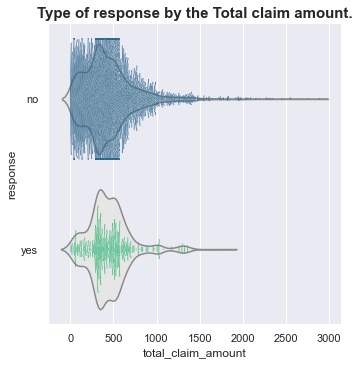

In [463]:
plt.figure(figsize=(16,10))
sns.catplot(data=df_marketing, x="total_claim_amount", y="response", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df_marketing, x="total_claim_amount", y="response", size=1, palette='viridis')

plt.title('Type of response by the Total claim amount.', size='15', fontweight='bold')


In [ ]:
#We can observe a tendence between no response and the Total Claim amount. 

Text(0.5, 1.0, 'Type of response by the Total claim amount.')

<Figure size 1440x1080 with 0 Axes>

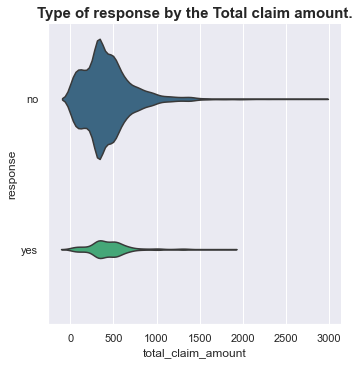

In [464]:
plt.figure(figsize=(20,15))
sns.catplot(data=df_marketing, x="total_claim_amount", y="response", kind="violin", inner=None, scale='count', palette='viridis')
#sns.swarmplot(data=df_marketing, x="total_claim_amount", y="response", size=1)
plt.title('Type of response by the Total claim amount.', size='15', fontweight='bold')


Text(0.5, 1.0, 'Type of response by the Total claim amount.')

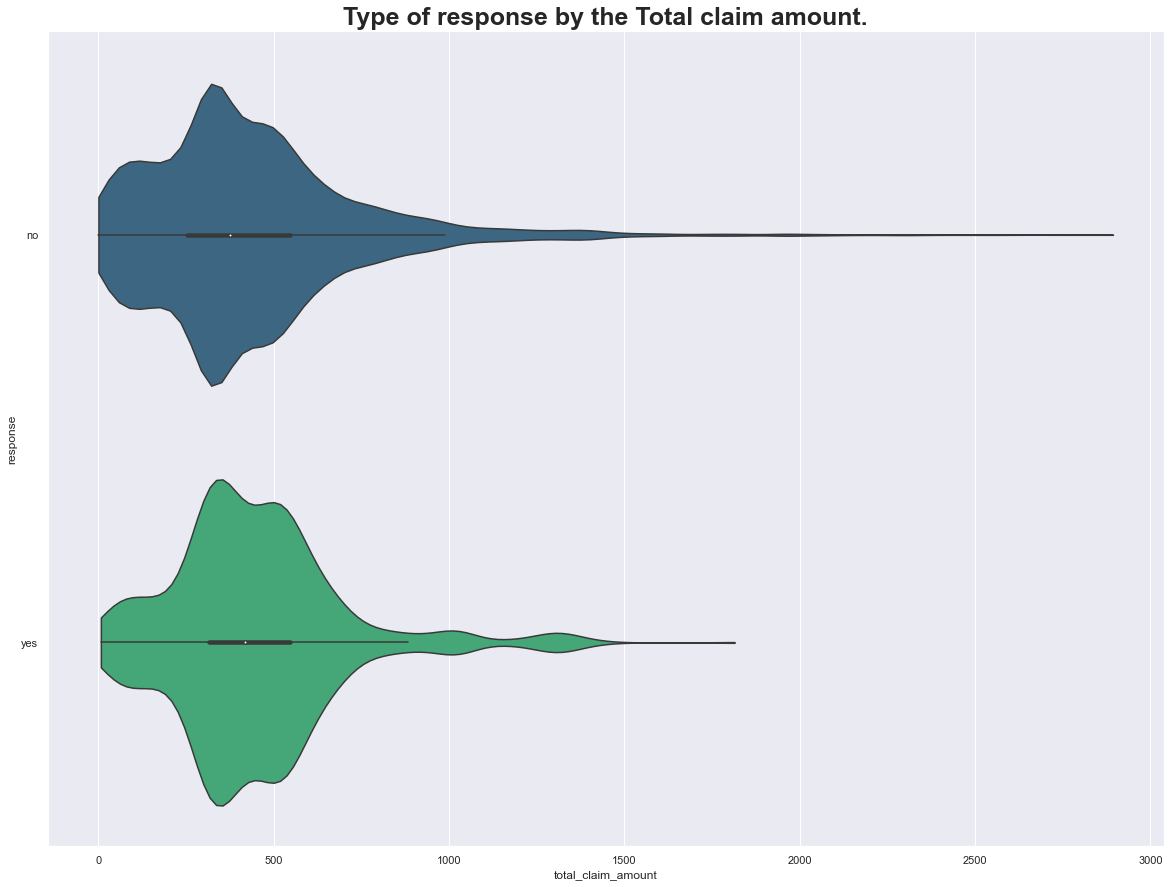

In [466]:
#other version with violin
plt.figure(figsize=(20,15))
sns.violinplot(data=df_marketing, x="total_claim_amount", y="response", cut=0, palette="viridis", as_cmap=True)
plt.title('Type of response by the Total claim amount.', size='25', fontweight='bold')


### Show a plot of the response by income. 

<Figure size 1440x1152 with 0 Axes>

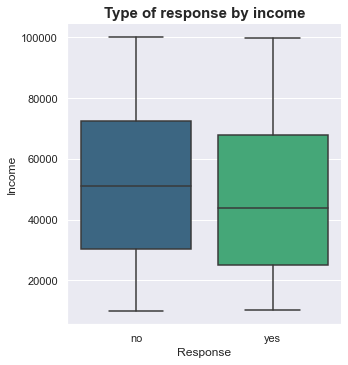

In [481]:
plt.figure(figsize=(20,16))

fig2 = sns.catplot(x='response', y = 'income', data = df_marketing, kind="box", margin_titles = True, palette='viridis')
plt.title('Type of response by income', size='15', fontweight='bold')
#fig2.fig.suptitle('Income distribution by response', size='15', y = 1.05)
fig2.set_ylabels('Income')
fig2.set_xlabels('Response')

In [531]:
# create a dataframe with the responde ratings by sales chanel.

response_by_income = df_marketing.groupby(['income','response']) ["Rating"].count().reset_index()
# create a dataframe with the responde ratings by sales chanel.
response_by_income

KeyError: 'Column not found: Rating'

### (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature. Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [473]:
list(df_marketing.columns)

['region',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

Text(0.5, 1.0, 'Looking for multicoliniarity')

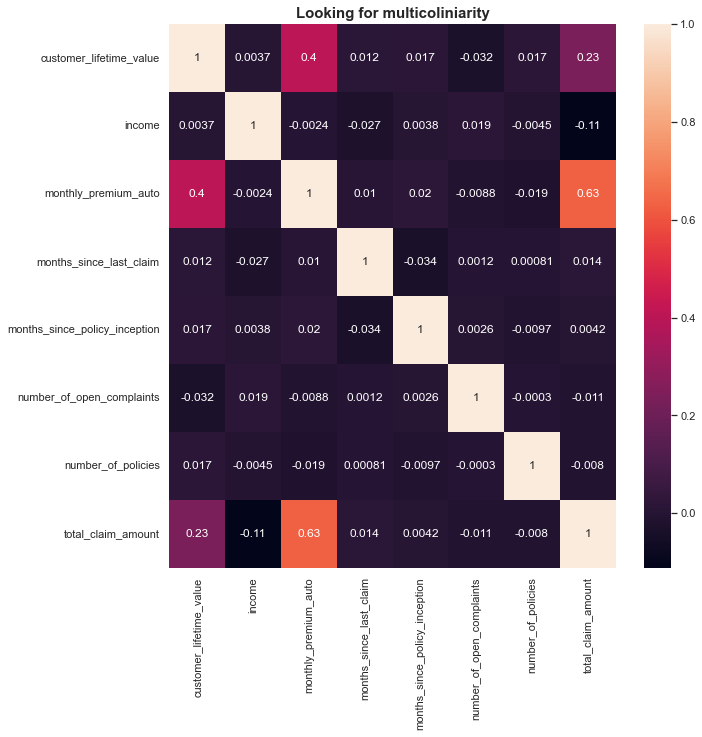

In [505]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_numerical.corr(), annot=True)
palette='viridis'
plt.title('Looking for multicoliniarity', size='15', fontweight='bold')


# CLEANING

In [495]:
df_marketing_Nan = df_marketing.isna().sum()
df_marketing_Nan


region                           0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
month                            0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
# not needed: df_marketing.dropna()

In [496]:
df_marketing = df_marketing.drop_duplicates()

<Figure size 2160x720 with 0 Axes>

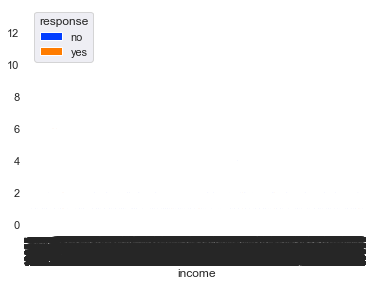

In [497]:
#plot both in the same bin
plt.figure(figsize=(30,10))
new = df_marketing.groupby(["income","response"]).size().unstack().plot(kind="bar",stacked=True)
plt.show()

ValueError: Could not interpret input 'Income'

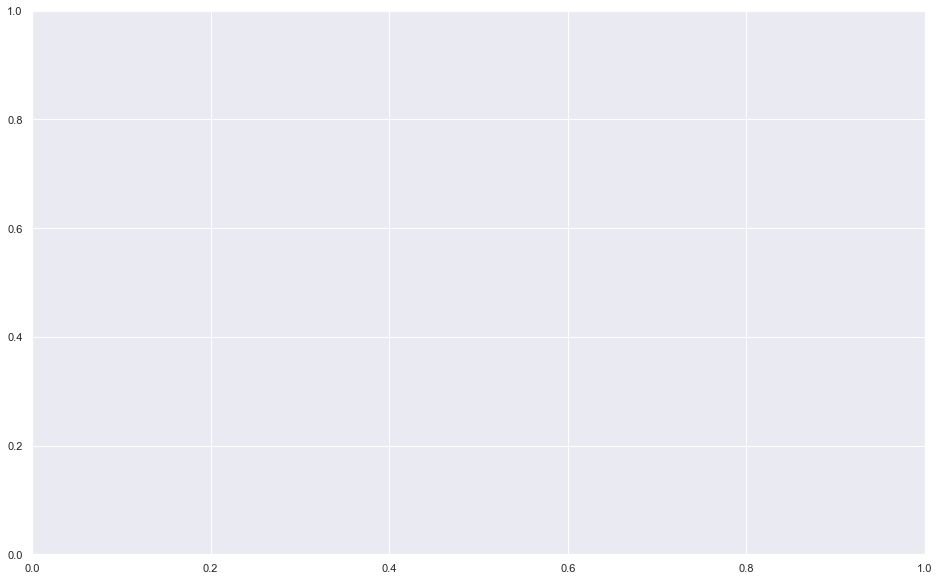

In [529]:
###Show a plot of the response by income divided into 


#plt.hist(df_marketing.groupby('response')['income'], bins=(5))
#plt.title('Income', size='15', fontweight='bold')


fig5, axes5 = plt.subplots(1,1,figsize=(16,10))

sns.barplot(x='Income', y='count', hue = 'response', data = reating_by_sales_chanel, palette='viridis')

plt.title('Response & Income', size='15', fontweight='bold')


In [ ]:
#plot both in the same bin
plt.figure(figsize=(30,10))
new = df_marketing.groupby(["income","response"]).size().unstack().plot(kind="bar",stacked=True)
plt.show()